In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import shap

# Análise exploratória

In [168]:
dados = pd.read_excel('Bases_Final_ADS_Jun2021.xlsx', sheet_name='dados')

In [169]:
dados.describe()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,...,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,499.413058,327.077018,949.482511,1058.505600,3399.487372,645.965645,1121.508683,2164.581106,2495.467859,7828.909078,...,84.451277,25.016701,16.035267,87.855248,96.298479,85.317993,27.535584,19.037744,84.211404,90.901443
std,117.082197,85.115276,230.050914,229.854143,622.482273,146.821214,122.253021,258.964022,260.203685,519.733801,...,19.000908,3.365524,3.297746,19.419767,9.619947,17.271913,2.002188,2.042238,18.971917,10.072189
min,283.104360,175.495300,539.451790,627.651660,2159.479470,364.326990,810.256280,1452.131560,1810.980190,6331.118910,...,46.932000,17.711111,8.993333,51.696000,64.969000,46.530450,22.314066,14.887778,45.084000,60.322438
25%,393.400500,241.178000,731.956970,850.131000,2848.940582,497.029030,1028.227250,1914.298240,2278.951250,7477.524742,...,70.594000,22.099031,12.986089,71.111000,90.718250,74.639963,25.738701,17.267983,70.202250,84.202900
50%,520.498000,340.640810,972.266000,1090.080000,3488.666500,693.921500,1140.072275,2215.213160,2557.742935,7783.614835,...,87.096000,25.251505,16.297009,91.070000,95.840000,89.454900,27.565394,19.429506,89.665000,91.069939
75%,602.572903,404.041558,1169.773077,1217.270647,3914.279410,769.517565,1228.590750,2394.268000,2693.228027,8272.468750,...,98.196820,28.089830,19.086559,101.420591,104.352478,96.392125,29.063378,20.868937,95.218902,97.190423
max,683.111370,460.262000,1390.622270,1552.666000,4571.717000,904.781750,1321.958000,2574.711000,3037.010600,8795.554000,...,132.299461,31.734409,22.198925,146.804402,116.958000,126.255031,32.022581,23.132233,137.334905,112.047328


In [170]:
null_df = pd.DataFrame({'Percentile':dados.isnull().sum()/len(dados), 'Count':dados.isnull().sum()})

In [171]:
null_df[null_df['Count'] > 0]

,Percentile,Count
com_co,0.096491,22
com_n,0.096491,22
com_ne,0.096491,22
com_s,0.096491,22
com_se,0.096491,22
ind_co,0.096491,22
ind_n,0.096491,22
ind_ne,0.096491,22
ind_s,0.096491,22
ind_se,0.096491,22


In [172]:
dados.dropna(inplace=True)

In [198]:
corr = data.corr()

In [199]:
corr.style.background_gradient(cmap='coolwarm')

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
com_co,1.000000,0.577684,0.854551,0.660835,0.762447,0.133382,-0.030037,-0.383039,0.315090,-0.190453,0.619618,0.406565,0.523593,0.401287,0.527802,0.198562,0.506459,0.319816,-0.232668,-0.197587,0.545915,0.668762,-0.051874,-0.290426,0.041106,0.070312,0.629354,0.128094,0.135163,-0.020444,0.473269,0.547195,0.092168,0.227674,0.133375,0.541678,0.562596,0.284511,-0.200871,-0.013138,0.568540,0.471418,0.174943,-0.377862
com_n,0.577684,1.000000,0.621411,-0.030193,0.088113,0.560406,0.220216,-0.499966,0.397377,-0.340816,0.579532,0.824618,0.483650,0.111031,0.060456,0.413606,0.316061,0.537350,0.207599,-0.165491,0.319083,0.121714,-0.021557,0.392259,0.262972,0.630186,0.410863,0.331241,0.550694,0.029175,0.077397,-0.056031,0.136110,0.339306,0.208510,-0.126882,-0.091735,0.323806,0.024251,0.071841,-0.050254,-0.078397,0.280185,-0.118743
com_ne,0.854551,0.621411,1.000000,0.612686,0.686635,0.081198,0.043782,-0.533770,0.181722,-0.420909,0.569478,0.516721,0.658581,0.441522,0.478894,0.305225,0.507242,0.444047,-0.110677,-0.337549,0.360924,0.501020,-0.137969,-0.273696,-0.011256,-0.050187,0.487859,0.113052,0.083060,-0.087583,0.408320,0.517657,0.072232,0.099891,0.081163,0.462319,0.470269,0.328166,-0.348656,-0.083034,0.453161,0.381952,0.194367,-0.537671
com_s,0.660835,-0.030193,0.612686,1.000000,0.886455,-0.263249,-0.092937,-0.177629,-0.005406,-0.155722,0.333923,-0.051387,0.400300,0.698473,0.751976,0.018637,0.281819,0.092882,-0.312241,-0.149771,0.268599,0.639774,-0.042046,-0.768184,-0.058333,-0.545179,0.300082,0.005586,-0.251549,-0.003545,0.448252,0.653874,0.077322,-0.049435,0.065676,0.854716,0.852655,0.229266,-0.423286,-0.043238,0.764880,0.736093,0.094633,-0.549793
com_se,0.762447,0.088113,0.686635,0.886455,1.000000,-0.345730,0.014226,-0.028883,-0.028497,-0.018922,0.218475,-0.069474,0.245091,0.410242,0.600936,-0.219359,0.501806,-0.127356,-0.270938,-0.004969,0.461632,0.678094,0.144294,-0.657734,-0.073854,-0.373080,0.442010,0.033925,-0.208165,0.148349,0.577391,0.742445,0.230017,0.214373,0.062004,0.799468,0.792409,0.180613,-0.315340,0.044035,0.811489,0.641117,0.165003,-0.360296
ind_co,0.133382,0.560406,0.081198,-0.263249,-0.345730,1.000000,-0.032145,-0.277204,0.616235,-0.095952,0.542915,0.572091,0.439395,0.194097,0.085158,0.492864,-0.150883,0.554523,0.259195,0.034252,-0.106597,-0.123665,-0.045260,0.480208,0.458073,0.437125,-0.011884,0.362973,0.641723,0.012115,-0.368724,-0.433452,0.003839,0.092672,0.368666,-0.399556,-0.324072,0.312367,0.391679,0.180722,-0.421660,-0.190694,0.183803,0.132503
ind_n,-0.030037,0.220216,0.043782,-0.092937,0.014226,-0.032145,1.000000,0.073815,-0.040438,-0.023058,-0.061142,0.174357,-0.055766,-0.146918,-0.077014,-0.174484,-0.142822,-0.167062,0.253258,0.136024,0.096594,0.048507,0.259277,0.116389,0.122774,0.177200,0.125154,0.187543,0.116353,0.232939,-0.016079,-0.008360,0.261848,0.348373,0.024186,-0.031024,-0.038139,0.038807,0.026094,0.114650,-0.052503,-0.024706,0.207066,0.126331
ind_ne,-0.383039,-0.499966,-0.533770,-0.177629,-0.028883,-0.277204,0.073815,1.000000,-0.010013,0.838759,-0.689940,-0.772727,-0.777967,-0.492019,-0.325556,-0.751613,0.103653,-0.839555,0.176722,0.779158,0.108149,-0.168556,0.610276,-0.018275,0.195211,-0.040160,-0.276954,0.107761,0.033030,0.602122,-0.004688,-0.084921,0.409048,0.479150,0.220517,-0.023638,-0.129814,-0.128540,0.589084,0.502224,0.043326,-0.208386,0.140703,0.765085
ind_s,0.315090,0.397377,0.181722,-0.005406,-0.028497,0.616235,-0.040438,-0.010013,1.000000,0.365353,0.319071,0.250843,0.203313,0.089455,0.085581,0.267267,0.061948,0.295827,0.012097,0.142872,0.023790,-0.055267,0.025354,0.298432,0.417824,0.245726,-0.090855,0.295859,0.581743,0.154698,-0.24

# Previsão

- Split data

In [175]:
dados['data_tidy'] = pd.to_datetime(dados.data_tidy , format = '%d/%m/%Y %H.%M.%S')
data = dados.drop(['data_tidy'], axis=1)
data.index = dados.data_tidy

In [176]:
target = data['ind_se']
variables = data.loc[:, data.columns != 'ind_se']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.33, random_state=42)

* Métricas

In [147]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

- ElasticNet Model

In [200]:
EN = ElasticNet(random_state=0)
EN.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 352528.7560490884, tolerance: 1985.8798170227528


ElasticNet(random_state=0)

In [201]:
y_predict = regr.predict(X_train)

In [202]:
regression_results(y_train, y_predict)

explained_variance:  0.964
mean_squared_log_error:  0.0002
r2:  0.964
MAE:  82.6933
MSE:  9924.675
RMSE:  99.6227


- Bayesian Ridge

In [180]:
BR = BayesianRidge(compute_score=True)
BR.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [181]:
y_predict_BR = BR.predict(X_train)

In [182]:
regression_results(y_train, y_predict_BR)

explained_variance:  0.9344
mean_squared_log_error:  0.0003
r2:  0.9344
MAE:  105.9622
MSE:  18105.1132
RMSE:  134.5552


- Regressão de Lasso

In [183]:
LS = linear_model.Lasso(alpha=0.1)
LS.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 252662.64691395717, tolerance: 1985.8798170227528


Lasso(alpha=0.1)

In [184]:
y_predict_LS = LS.predict(X_train)

In [185]:
regression_results(y_train, y_predict_LS)

explained_variance:  0.9752
mean_squared_log_error:  0.0001
r2:  0.9752
MAE:  68.4119
MSE:  6846.4515
RMSE:  82.7433


- Lasso Least Angle Regression

In [186]:
LL = linear_model.LassoLars(alpha=0.01)
LL.fit(X_train, y_train)

LassoLars(alpha=0.01)

In [187]:
y_predict_LL = LL.predict(X_train)

In [188]:
regression_results(y_train, y_predict_LL)

explained_variance:  0.975
mean_squared_log_error:  0.0001
r2:  0.975
MAE:  68.6692
MSE:  6893.3489
RMSE:  83.0262


- Ridge

In [189]:
RD = Ridge(alpha=1.0)
RD.fit(X_train, y_train)

Ridge()

In [190]:
y_predict_RD = RD.predict(X_train)

In [191]:
regression_results(y_train, y_predict_RD)

explained_variance:  0.9742
mean_squared_log_error:  0.0001
r2:  0.9742
MAE:  70.8191
MSE:  7110.4657
RMSE:  84.3236


# Variáveis

In [192]:
X_train_summary = shap.kmeans(X_train, 10)

In [203]:
ex = shap.KernelExplainer(EN.predict, X_train_summary)

In [204]:
shap.initjs()

In [205]:
shap_values = ex.shap_values(X_test.iloc[0,:])

In [206]:
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

  0%|          | 0/36 [00:00<?, ?it/s]

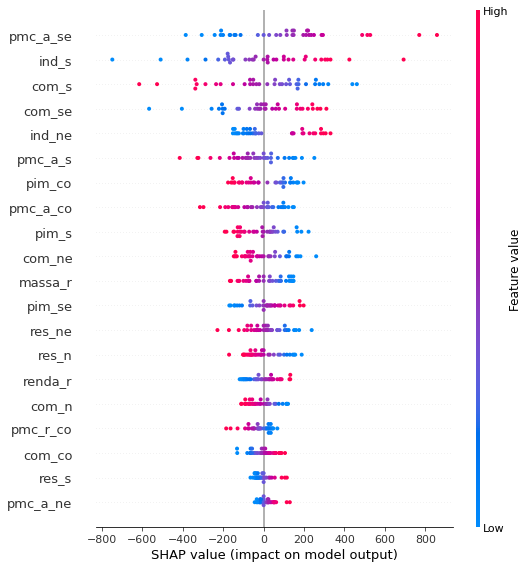

In [207]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)